In [1]:
#!pip install pyadi-iio
#!pip install matplotlib
#!pip install scikit-dsp-comm
#!pip install scikit-commpy
#!pip install statsmodels

In [2]:
import adi
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.graphics.gofplots import qqplot
from scipy.fft import fft,fftfreq

In [3]:
def plotHistogramas(signal):
    plt.figure(figsize=(12, 4))

    # Histograma de I
    plt.subplot(1, 2, 1)
    plt.hist(np.real(signal), bins=50, color='skyblue', edgecolor='black')
    plt.title('Histograma de componente I')
    plt.xlabel('Amplitud')
    plt.ylabel('Frecuencia')

    # Histograma de Q
    plt.subplot(1, 2, 2)
    plt.hist(np.imag(signal), bins=50, color='orange', edgecolor='black')
    plt.title('Histograma de componente Q')
    plt.xlabel('Amplitud')
    plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

def plotFrequency(signal):

    transformada =fft(signal)
    frecuencias = fftfreq(len(transformada))

    plt.figure(figsize=(18, 6))
    plt.plot(frecuencias, np.abs(transformada), color='b')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')
    plt.title('Gráfica en Frecuencia de la Señal')
    plt.grid()
    plt.show()
    
def plotTemporal(signal):
    
    plt.figure(figsize=(18, 5))
    plt.plot(np.real(signal), label='Real')
    plt.plot(np.imag(signal), label='Imag', linestyle='--')
    plt.title('Señal en el dominio temporal')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    plt.grid()
    plt.show()

In [4]:
ref = 0.5
nb_samples = 2**15

z = np.random.uniform(size = nb_samples)
x = [1 if z[i]>ref else 0 for i in range(len(z))]

txSignal = (2*np.repeat(x, 2**4)-1)++1j*(2*np.repeat(x, 2**4)-1)

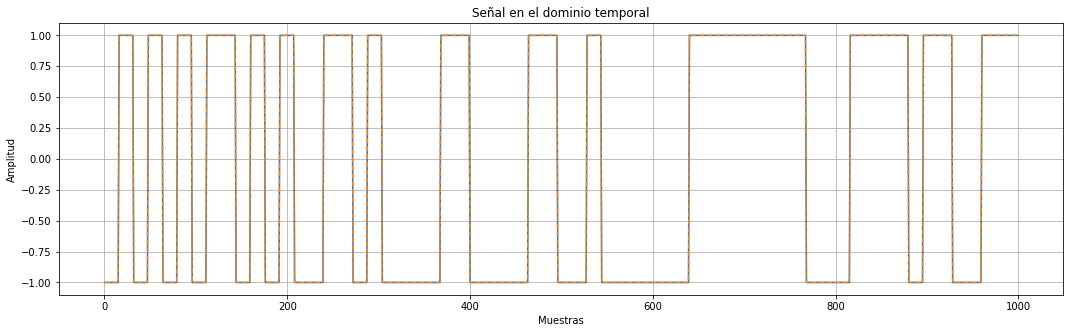

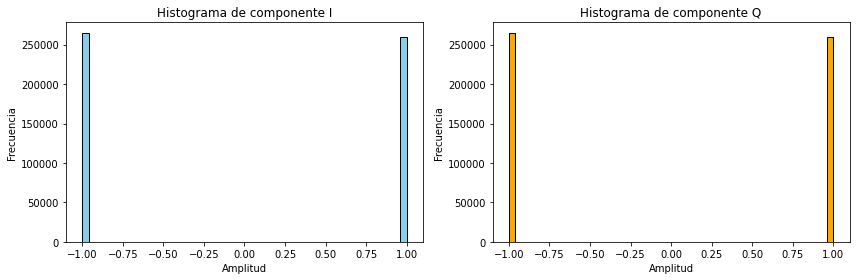

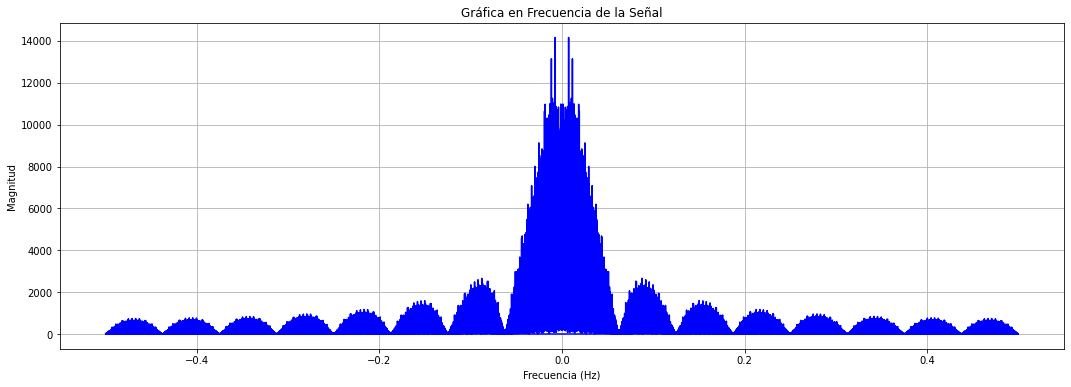

In [5]:
plotTemporal(txSignal[0:1000])

plotHistogramas(txSignal)

plotFrequency(txSignal)

En el dominio temporal, se observa una señal que alterna entre valores positivos y negativos con transiciones abruptas, 
típico de una secuencia digital. Los histogramas centrales para las componentes I y Q revelan una distribución bimodal con concentraciones en -1 y 1, característica de modulaciones digitales binarias como BPSK. Finalmente, el espectro de frecuencia (abajo) presenta un lóbulo principal prominente en el centro con lóbulos secundarios simétricos, patrón común en señales digitales moduladas con algún tipo de conformación de pulsos.

# PUNTO 2

In [6]:
Uri = "ip:192.168.1.33"
sdr = adi.Pluto(Uri)
Uri              = Uri
Loopback         = 0       
SamplingRate     = 2.0e6   

TxLOFreq         = 962e6   
TxAtten          = -79     
TxRfBw           = 2.0e6    
tx_cyclic_buffer = True

RxLOFreq         = TxLOFreq  
GainControlModes = "manual"
RxHardwareGain   = 70       
RxRfBw           = TxRfBw   
RxBufferSize     = len(txSignal)   

sdr.loopback = Loopback
sdr.sample_rate = SamplingRate     
sdr.tx_rf_bandwidth = int(TxRfBw)  
sdr.rx_rf_bandwidth = int(RxRfBw)  
sdr.gain_control_mode_chan0 = GainControlModes 
sdr.tx_hardwaregain_chan0   = TxAtten          
sdr.rx_hardwaregain_chan0   = RxHardwareGain   
sdr.tx_lo = int(TxLOFreq)  
sdr.rx_lo = int(RxLOFreq)
sdr.rx_buffer_size   = RxBufferSize
sdr.tx_cyclic_buffer = tx_cyclic_buffer

In [7]:
sdr.tx_destroy_buffer()
sdr.tx_cyclic_buffer = tx_cyclic_buffer
sdr.tx(txSignal*(2**15-1))

for i in range(0,10):
    raw_data = sdr.rx()

sdr_rx_hardwaregain_chan0 = 70
rxSignal = sdr.rx()
rxSignal = rxSignal / np.sqrt(np.mean(np.abs(rxSignal)**2))

normalized_power = np.mean(np.abs(rxSignal)**2)
print("P: " + str(normalized_power))

P: 1.0000000000000002


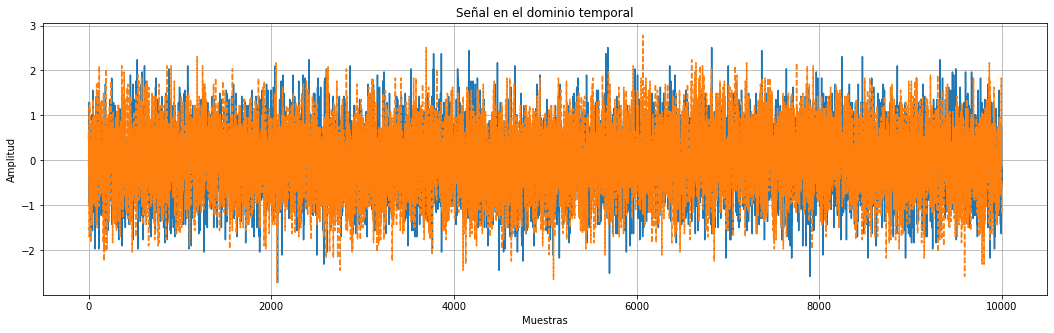

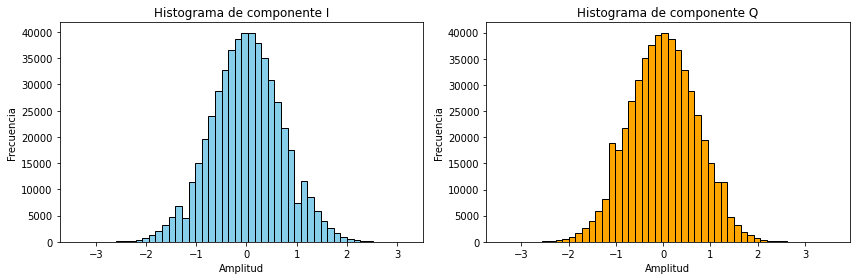

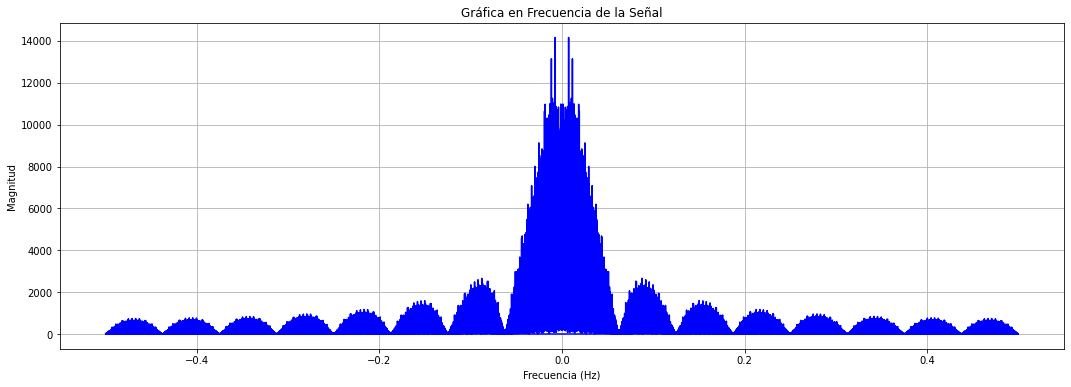

In [8]:
plotTemporal(rxSignal[0:10000])

plotHistogramas(rxSignal)

plotFrequency(txSignal)

## PUNTO 3

In [9]:
TxAtten          = -70

sdr.tx_destroy_buffer()
sdr.tx_cyclic_buffer = tx_cyclic_buffer
sdr.tx(txSignal*(2**15-1))

for i in range(0,10):
    raw_data = sdr.rx()

sdr_rx_hardwaregain_chan0 = 70
rxSignal = sdr.rx()
rxSignal = rxSignal / np.sqrt(np.mean(np.abs(rxSignal)**2))

normalized_power = np.mean(np.abs(rxSignal)**2)
print("P: " + str(normalized_power))

P: 0.9999999999999998


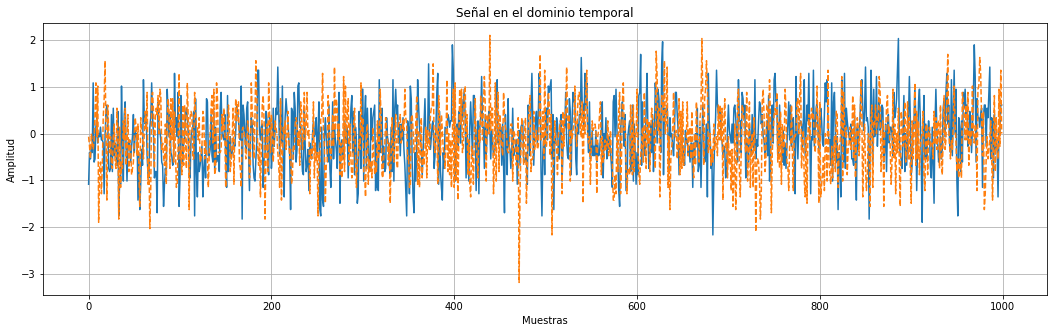

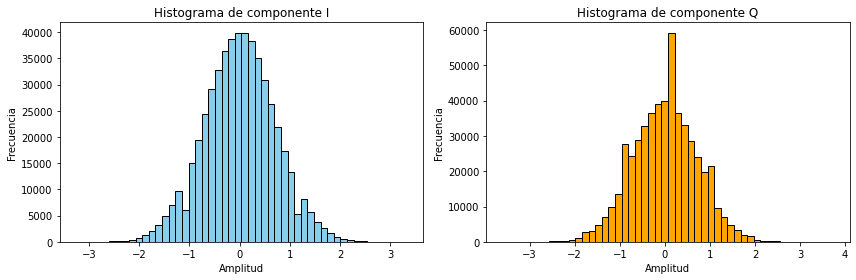

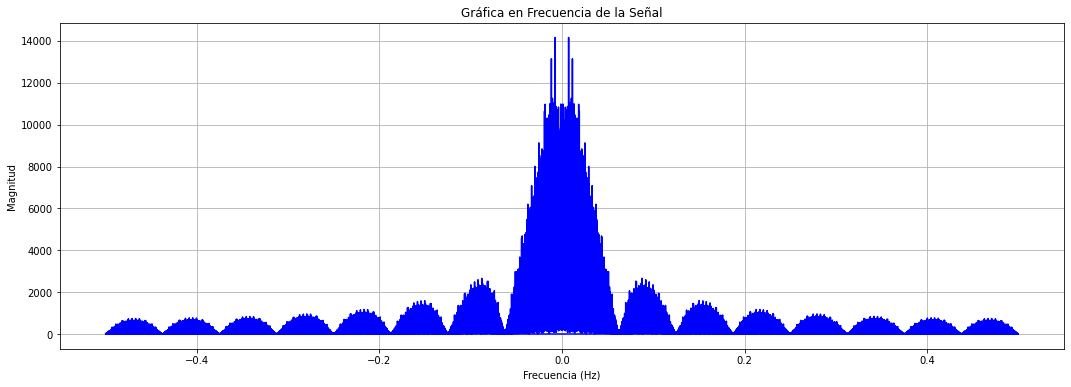

In [10]:
plotTemporal(rxSignal[0:1000])

plotHistogramas(rxSignal)

plotFrequency(txSignal)

## PUNTO 4

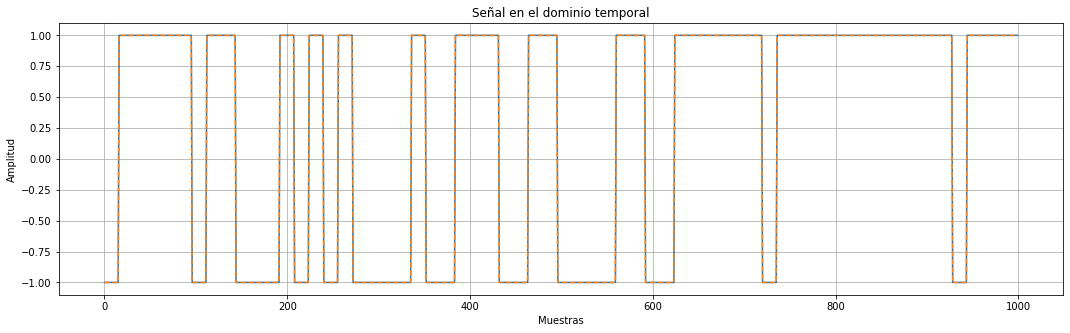

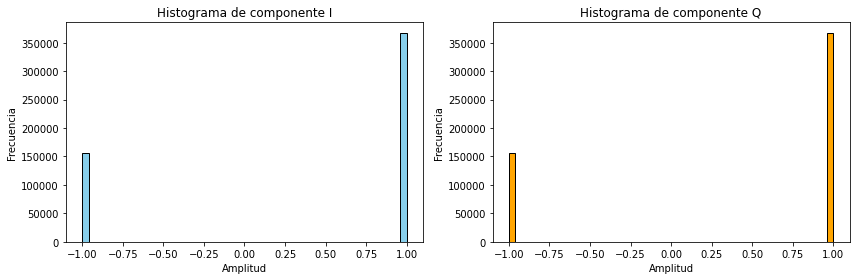

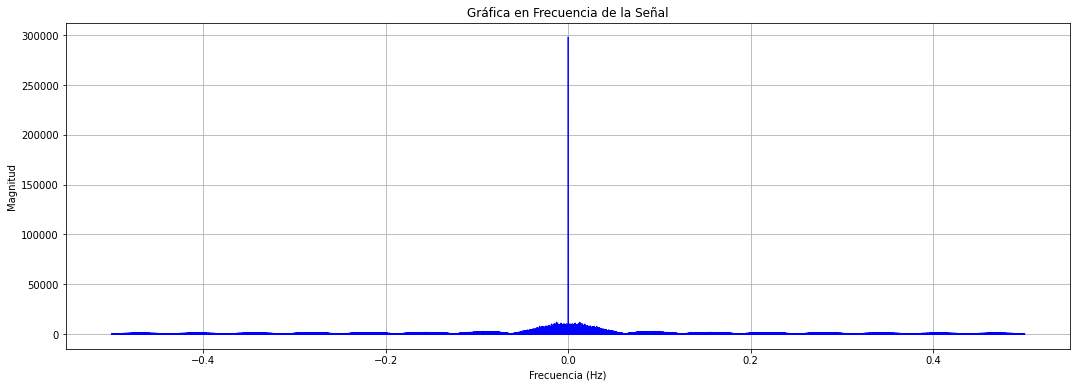

In [11]:
ref = 0.3

z = np.random.uniform(size = nb_samples)
x = [1 if z[i]>ref else 0 for i in range(len(z))]

txSignal = (2*np.repeat(x, 2**4)-1)++1j*(2*np.repeat(x, 2**4)-1)

plotTemporal(txSignal[0:1000])

plotHistogramas(txSignal)

plotFrequency(txSignal)

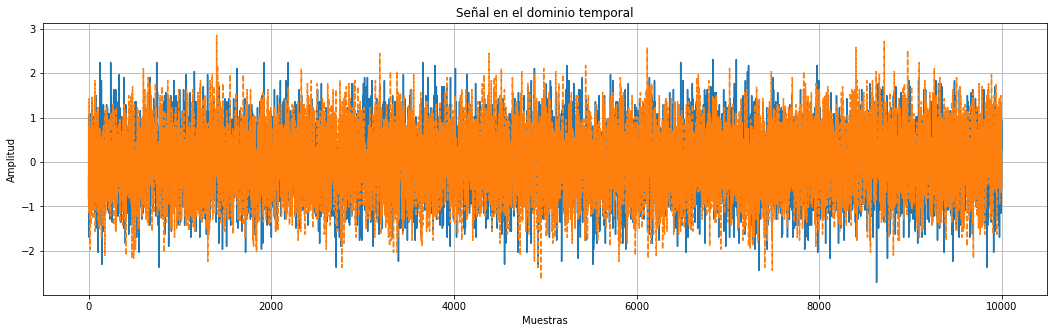

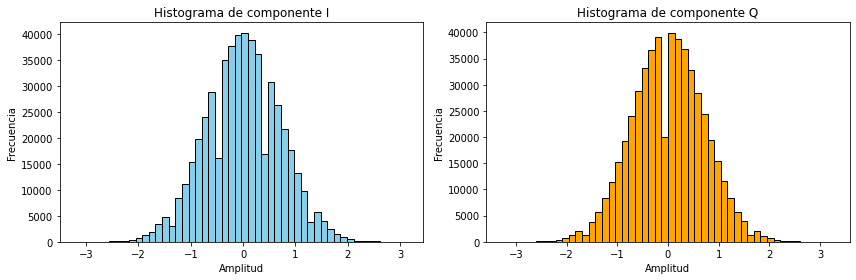

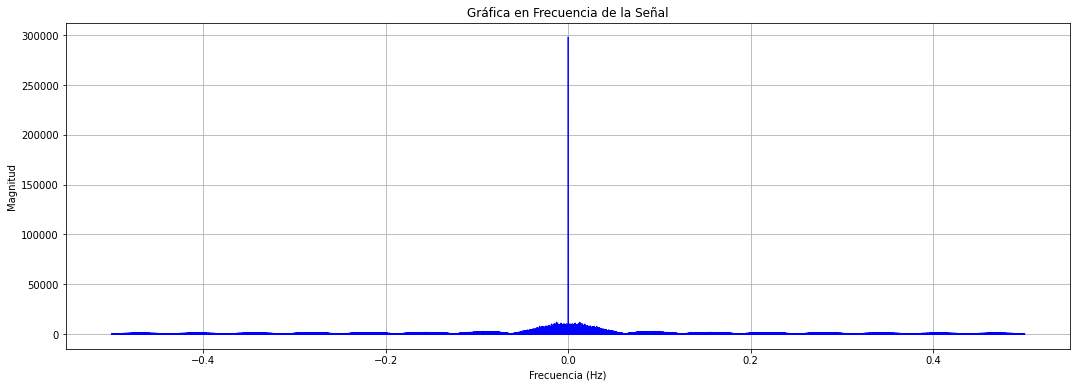

In [12]:
for i in range(0,10):
    raw_data = sdr.rx()

rxSignal = sdr.rx()
rxSignal = rxSignal / np.sqrt(np.mean(np.abs(rxSignal)**2))

plotTemporal(rxSignal[0:10000])

plotHistogramas(rxSignal)

plotFrequency(txSignal)

## PUNTO 5

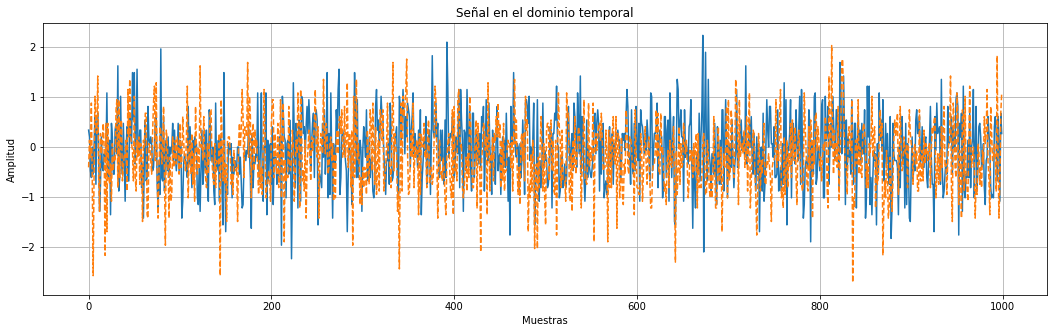

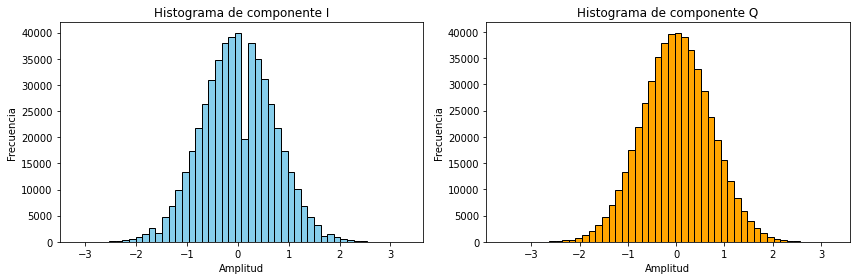

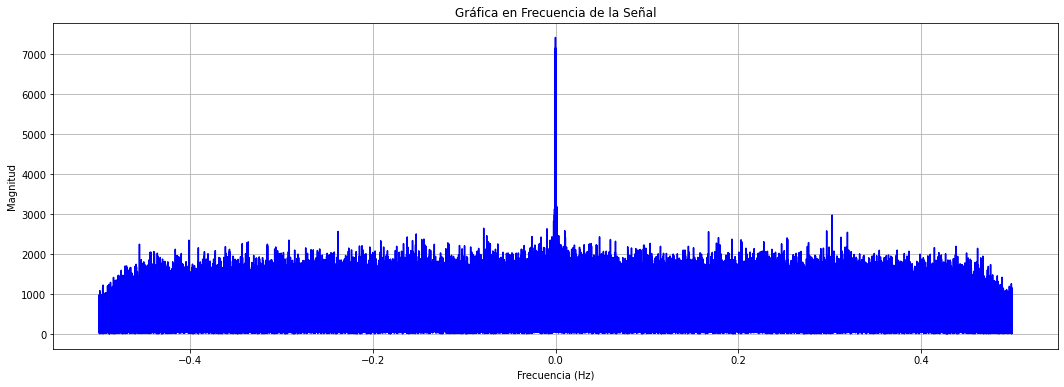

In [13]:
hip = np.array([-1, -0.3333, 0.3333, 1])
tx_signal = np.random.choice(hip, size=nb_samples)
txSignal = 2 * np.repeat(tx_signal, 2**4) - 1

for i in range(0,10):
    raw_data = sdr.rx()

rxSignal = sdr.rx()
rxSignal = rxSignal / np.sqrt(np.mean(np.abs(rxSignal)**2))

plotTemporal(rxSignal[0:1000])

plotHistogramas(rxSignal)

plotFrequency(rxSignal)

In [ ]:
sdr.tx_destroy_buffer()